In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [12]:
df=pd.read_csv("HR.csv")
df.describe()
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [13]:
d1=pd.get_dummies(df["Department"]).astype(int)
d1=d1.drop("IT",axis=1)

In [14]:
quality={"low":1,"medium":2,"high":3}
df["salary"]=df["salary"].map(quality)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,1
14995,0.37,0.48,2,160,3,0,1,0,support,1
14996,0.37,0.53,2,143,3,0,1,0,support,1
14997,0.11,0.96,6,280,4,0,1,0,support,1


In [15]:
df=df.drop("Department",axis=1)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,1,0,1
1,0.80,0.86,5,262,6,0,1,0,2
2,0.11,0.88,7,272,4,0,1,0,2
3,0.72,0.87,5,223,5,0,1,0,1
4,0.37,0.52,2,159,3,0,1,0,1
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,1
14995,0.37,0.48,2,160,3,0,1,0,1
14996,0.37,0.53,2,143,3,0,1,0,1
14997,0.11,0.96,6,280,4,0,1,0,1


In [16]:
correlation_matrix=df.corr()
correlation_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.098119
salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,1.000000


### Factors affecting retention are:(based correlation)
#### 1.Salary
#### 2.satisification level
#### 3.work accident 
#### 4.time spend

<BarContainer object of 14999 artists>

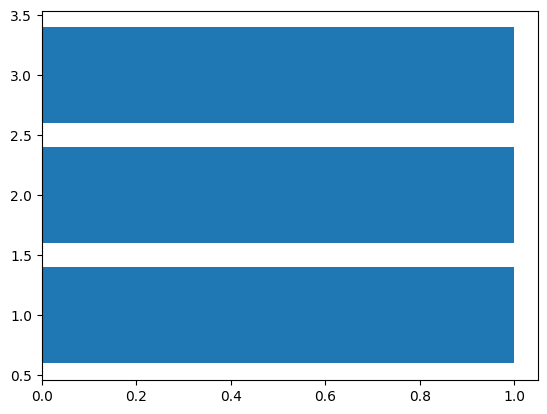

In [21]:
plt.barh(df["salary"],df["left"])

In [27]:
model=LogisticRegression()
model

LogisticRegression()

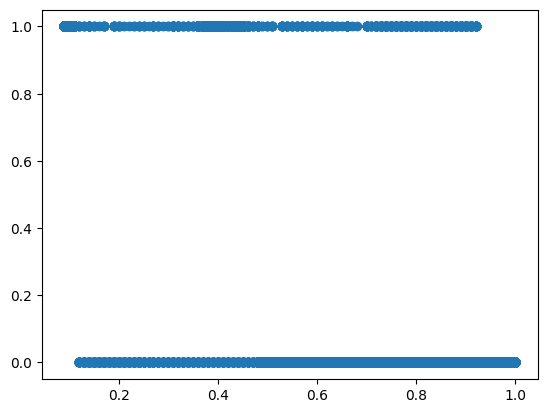

In [65]:
X=df["salary"].values.reshape(-1,1)
Y=df["left"]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)
plt.scatter(df["satisfaction_level"],df["left"])

In [73]:
model.fit(X_train,Y_train)

LogisticRegression()

In [72]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], shape=(3750,))

In [70]:
model.predict_proba(X_test)

array([[0.81105565, 0.18894435],
       [0.69452175, 0.30547825],
       [0.81105565, 0.18894435],
       ...,
       [0.81105565, 0.18894435],
       [0.69452175, 0.30547825],
       [0.69452175, 0.30547825]], shape=(3750, 2))

In [71]:
model.score(X_test,Y_test)

0.7632